# Scraped Lineups API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedLineupsAPI/Scraped%20Lineups%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Lineups API

The goal of Scraped Lineups API is to collect and return scraped lineups by the given filters or lineup IDs. This can be done by using the `ScrapedLineupsAPI` class and calling appropriate methods


#### 1. Request by filters

Lineups can be retrieved for specific filters, by calling the `get_lineups` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`message_ids` List of MessageIDs

`external_message_ids` List of ExternalMessageIDs

`received_date_from` Earliest date the lineup received

`received_date_to` Latest date the lineup received

`updated_date_from` Earliest date the lineup updated

`updated_date_to` Latest date the lineup updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by lineup IDs

Lineups can be retrieved for specific lineup IDs, by calling the `get_lineups_by_lineup_ids` method with the following argument:

#### Required

`lineup_ids` A list of lineup ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_imo, scraped_deadweight, scraped_year_built, scraped_eta, scraped_etb, scraped_etd, scraped_location, scraped_quantity, scraped_cargo_type, scraped_api_gravity, scraped_origin, scraped_destination, scraped_supplier, scraped_charterer, scraped_buyer, scraped_port_agent
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class, commercial_operator_id, commercial_operator
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
location_name, location_taxonomy, operation_type, cargo_type, cargo_group, origin_name, origin_taxonomy, destination_name, destination_taxonomy, supplier, charterer, buyer, port_agent, vessel_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content, subject
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_lineups import ScrapedLineupsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedLineupsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedLineupsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker lineups received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_lineups` method, as below

In [6]:
scraped_lineups = api.get_lineups(
    vessel_type=1,
    received_date_from=received_date_from,
)

next(iter(scraped_lineups), None)

ScrapedLineup(lineup_id=2130615, message_id=18643500, external_message_id=None, parsed_part_id=29281021, line_from=14, line_to=14, in_line_order=None, source='Email', updated_date=datetime.datetime(2021, 10, 6, 14, 1, 27, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2021, 9, 25, 7, 44, 54, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='MARAN PLATO', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=9399507, vessel_name='Maran Plato', deadweight=158267, year_built=2009, liquid_capacity=171736, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=85, vessel_class='Suezmax', commercial_operator_id=917, commercial_operator='Maran Tankers Management', scraped_eta='25/12h00', eta=datetime.datetime(2021, 9, 25, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb=None, etb=None, scraped_etd='30/9', etd=datetime.datetime(2021, 9, 30, 0, 0, tzinfo=datetime.timezone.utc), scraped_location='Fos', location_geo_id=7348, location_name='Fo

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_lineups)

df.head()

,lineup_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,2130615,18643500,None,29281021,14,14,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,ExxonMobil,None,None,None,1.0,Expected,MARAN PLATO;25/12h00;Lucina + CJ Blend;39000+8...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
1,2130616,18643500,None,29281021,19,19,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Petroineos,None,None,None,1.0,Expected,CE HAMILTON;2021-10-12 00:00:00;Escravos ;7500...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
2,2130617,18643500,None,29281021,18,18,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Varo,None,None,None,1.0,Expected,MINERVA ZENOBIA;06/16h00;WTI;90000;Spse/Varo;U...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
3,2130618,18643500,None,29281021,15,15,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Petroineos,None,None,None,1.0,Expected,NS COLUMBUS;26/03h00;Shararah;80000;Petroineos...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
4,2130619,18643500,None,29281021,16,16,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Petroineos,None,None,None,1.0,Expected,PRIMERO;26/12h00;Saharan;95000;Petroineos;Alge...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True


#### Request by IMOs

To get lineups for specific vessel(s) by their IMO number(s), you can simple call the `get_lineups` method for a list of desired IMO(s)

Adding some date argument is always feasible

In [8]:
imos = [9787182, 9411238, 9399507, 9282625, 9447299]  # Or add a list of your desired IMOs

scraped_lineups_by_imos = api.get_lineups(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_lineups_by_imos)
df_by_imos.head()

,lineup_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,2130615,18643500,None,29281021,14,14,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,ExxonMobil,None,None,None,1.0,Expected,MARAN PLATO;25/12h00;Lucina + CJ Blend;39000+8...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
1,2130616,18643500,None,29281021,19,19,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Petroineos,None,None,None,1.0,Expected,CE HAMILTON;2021-10-12 00:00:00;Escravos ;7500...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
2,2130617,18643500,None,29281021,18,18,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Varo,None,None,None,1.0,Expected,MINERVA ZENOBIA;06/16h00;WTI;90000;Spse/Varo;U...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
3,2126258,18643622,None,29243668,11,11,None,Email,2021-09-25 08:03:55+00:00,2021-09-25 08:01:00+00:00,...,None,Cory Bros,None,None,NaN,None,9\t2021-09-26 22:00:00\tPGC COMPANION\tCrude/O...,SignalWebScraperBot - Milford Haven - 2021-09-...,Signal Maritime,True
4,2126401,18644270,None,29244989,47,47,None,Email,2021-09-27 13:12:31+00:00,2021-09-25 13:43:20+00:00,...,Iplom,None,None,None,NaN,None,FT NERVI 24/16:12 28/LP...,Genoa ports situation,Nolarma,True


#### Request by Message or ExternalMessage IDs

To retrieve lineups for particular message ID(s), you should include an extra parameter called `message_ids` when using the `get_lineups` method. This parameter should contain a list of message IDs. For instance,

In [9]:
message_ids = [18643500, 18643622, 18644270]
scraped_lineups_by_message_ids = api.get_lineups(
    vessel_type=vessel_type,
    message_ids=message_ids,
)

next(iter(scraped_lineups_by_message_ids), None)

ScrapedLineup(lineup_id=2130615, message_id=18643500, external_message_id=None, parsed_part_id=29281021, line_from=14, line_to=14, in_line_order=None, source='Email', updated_date=datetime.datetime(2021, 10, 6, 14, 1, 27, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2021, 9, 25, 7, 44, 54, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='MARAN PLATO', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=9399507, vessel_name='Maran Plato', deadweight=158267, year_built=2009, liquid_capacity=171736, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=85, vessel_class='Suezmax', commercial_operator_id=917, commercial_operator='Maran Tankers Management', scraped_eta='25/12h00', eta=datetime.datetime(2021, 9, 25, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb=None, etb=None, scraped_etd='30/9', etd=datetime.datetime(2021, 9, 30, 0, 0, tzinfo=datetime.timezone.utc), scraped_location='Fos', location_geo_id=7348, location_name='Fo

You can achieve a similar result for external message IDs by providing an argument called `external_message_ids`.

#### Request by Lineup IDs

In the same manner, to get data for specific lineup ID(s), you must call the `get_lineups_by_lineup_ids` method for a list of desired lineup ID(s)

Date arguments are not available in this method

In [10]:
lineup_ids = [2130615, 2130616, 2130617, 2130618, 2130619]  # Or add a list of your desired lineup IDs

scraped_lineups_by_ids = api.get_lineups_by_lineup_ids(
    lineup_ids=lineup_ids,
)

df_by_ids = pd.DataFrame(scraped_lineups_by_ids)
df_by_ids.head()

,lineup_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,2130615,18643500,None,29281021,14,14,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,ExxonMobil,None,None,None,1,Expected,MARAN PLATO;25/12h00;Lucina + CJ Blend;39000+8...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
1,2130616,18643500,None,29281021,19,19,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Petroineos,None,None,None,1,Expected,CE HAMILTON;2021-10-12 00:00:00;Escravos ;7500...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
2,2130617,18643500,None,29281021,18,18,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Varo,None,None,None,1,Expected,MINERVA ZENOBIA;06/16h00;WTI;90000;Spse/Varo;U...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
3,2130618,18643500,None,29281021,15,15,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Petroineos,None,None,None,1,Expected,NS COLUMBUS;26/03h00;Shararah;80000;Petroineos...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True
4,2130619,18643500,None,29281021,16,16,None,Email,2021-10-06 14:01:27+00:00,2021-09-25 07:44:54+00:00,...,Petroineos,None,None,None,1,Expected,PRIMERO;26/12h00;Saharan;95000;Petroineos;Alge...,Port situation at Fos crude oil terminal on 25...,Ferrari Shipping Agency,True


#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [11]:
scraped_mapped_columns = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_location',
    'location_name',
    'scraped_origin',
    'origin_name',
    'scraped_cargo_type',
    'cargo_type',
    'scraped_quantity',
    'quantity',
]

scraped_mapped_df = pd.DataFrame(scraped_lineups, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_vessel_name,vessel_name,scraped_location,location_name,scraped_origin,origin_name,scraped_cargo_type,cargo_type,scraped_quantity,quantity
0,MARAN PLATO,Maran Plato,Fos,Fos,West Africa,West Africa,CJ Blend,CJ Blend,87000,87000.0
1,CE HAMILTON,CE-Hamilton,Fos,Fos,West Africa,West Africa,Escravos,Escravos,75000,75000.0
2,MINERVA ZENOBIA,Minerva Zenobia,Fos,Fos,Usa,United States,WTI,West Texas Intermediate,90000,90000.0
3,NS COLUMBUS,NS Columbus,Fos,Fos,Libya,Libya,El Sharara,El Sharara,80000,80000.0
4,PRIMERO,Primero,Fos,Fos,Algeria,Algeria,Saharan,Saharan Blend,95000,95000.0


## Examples

Let's start by fetching all tanker lineups received the last week

In [12]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_lineups = api.get_lineups(
    vessel_type=example_vessel_type,
    received_date_from=example_date_from,
)

#### Exclude deleted scraped lineups

The `is_deleted` property of a scraped lineup indicates whether it is valid or not. If it is set to `True`, the corresponding `lineup_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped lineups in the following examples.

In [13]:
example_scraped_lineups = [lineup for lineup in example_scraped_lineups if not lineup.is_deleted]

next(iter(example_scraped_lineups), None)

ScrapedLineup(lineup_id=2109422, message_id=18495101, external_message_id=None, parsed_part_id=28993150, line_from=12, line_to=12, in_line_order=None, source='Email', updated_date=datetime.datetime(2021, 9, 19, 8, 2, 9, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2021, 9, 19, 8, 0, 22, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='LARA VENTURE', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=6421957, vessel_name='Venture', deadweight=2134, year_built=1964, liquid_capacity=2506, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=90, vessel_class='Small', commercial_operator_id=-1, commercial_operator=None, scraped_eta=None, eta=None, scraped_etb='2021-09-15', etb=datetime.datetime(2021, 9, 15, 0, 0, tzinfo=datetime.timezone.utc), scraped_etd=None, etd=None, scraped_location='Maputo', location_geo_id=3675, location_name='Maputo', location_taxonomy_id=2, location_taxonomy='Port', operation_type_id=None, operation_typ

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [14]:
example_columns = [
    'imo',
    'location_name',   
    'operation_type',
    'eta',
    'quantity',
    'is_deleted'
]

data = pd.DataFrame(example_scraped_lineups, columns=example_columns).astype({'imo': 'Int64'})

data.head()

,imo,location_name,operation_type,eta,quantity,is_deleted
0,6421957,Maputo,None,NaT,29666.0,False
1,9252979,Maputo,None,NaT,19983.0,False
2,8641276,Maputo,None,NaT,19834.0,False
3,8923844,Maputo,None,NaT,41000.0,False
4,9308900,Maputo,None,NaT,1554.0,False


#### Top 10 Ports

In this example, we will find the top 10 Ports, based on the number of distinct operations

In [15]:
top_ports = data[data.operation_type.notna()]\
    [['location_name', 'imo', 'operation_type']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head(10)\
    .index\
    .tolist()

top_ports_df = data[data.location_name.isin(top_ports)]

top_ports_pivot = pd.pivot_table(
    top_ports_df,
    index='location_name',
    columns='operation_type',
    values='imo',
    aggfunc=lambda x: len(x.unique()),
    fill_value=0,
    dropna=False,
).reset_index().rename_axis(None, axis=1)

top_ports_pivot.index = top_ports_pivot.location_name

top_ports_pivot  = top_ports_pivot.loc[top_ports].reset_index(drop=True)
top_ports_pivot

,location_name,Discharge,Load
0,Sikka,18,27
1,Ceyhan,0,29
2,Lanshan,18,0
3,Fos,15,3
4,Vadinar,11,5
5,Genoa,8,3
6,Paradip,11,0
7,Ningbo,11,0
8,Dongjiangkou,10,0
9,Mumbai,8,2


And display results in a stacked bar plot

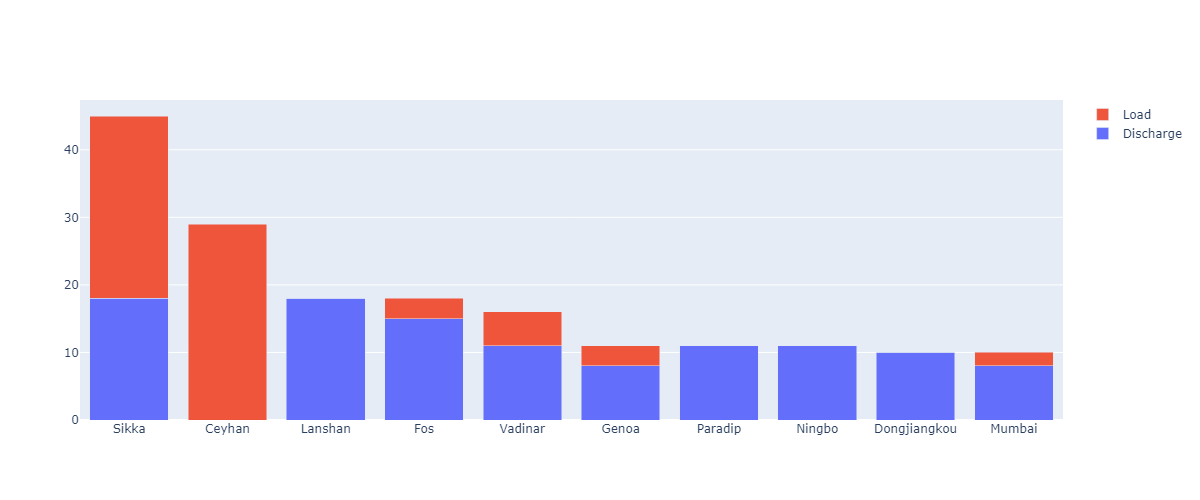

In [16]:
ports_list = top_ports_pivot.location_name.tolist()

disch_bar = 'Discharge' in top_ports_pivot and go.Bar(
    name='Discharge',
    x=ports_list,
    y=top_ports_pivot.Discharge.tolist(),
)
load_bar = 'Load' in top_ports_pivot and go.Bar(
    name='Load',
    x=ports_list,
    y=top_ports_pivot.Load.tolist(),
)
waypoint_bar = 'Waypoint' in top_ports_pivot and go.Bar(
    name='Waypoint',
    x=ports_list,
    y=top_ports_pivot.Waypoint.tolist(),
)
fig_data = list(filter(
    lambda x: x,
    [disch_bar, load_bar, waypoint_bar]
))

fig = go.Figure(data=fig_data)

fig.update_layout(barmode='stack')
fig.show()

#### Imported quantity in specific ports

In this example, we will create a visualization, for the total cargo quantity discharging in specifc ports per day over the next week

In [17]:
ports = data[data.operation_type == 'Discharge'][['imo', 'location_name']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head()\
    .index\
    .tolist()

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

ports

['Sikka', 'Lanshan', 'Fos', 'Paradip', 'Vadinar']

Create the pivot table

In [18]:
exports_mask = data.location_name.isin(ports) & (data.operation_type == 'Discharge')

df_exports = data[exports_mask][['eta', 'location_name', 'quantity', 'imo']].drop_duplicates()

df_pivot = pd\
    .pivot_table(
        df_exports,
        columns='location_name',
        index='eta',
        values='quantity',
        aggfunc=sum,
        fill_value=0,
    )\
    .reindex(index=this_week_days, fill_value=0)\
    .reset_index()\
    .rename(columns={'index': 'eta'})\
    .rename_axis(None, axis=1)

df_pivot

,eta,Fos,Lanshan,Paradip,Sikka,Vadinar
0,2021-09-18 00:00:00+00:00,15000,0,0,431980,0
1,2021-09-19 00:00:00+00:00,80000,130000,398579,0,265000
2,2021-09-20 00:00:00+00:00,90000,0,546395,290304,290641
3,2021-09-21 00:00:00+00:00,78000,140000,0,572705,211760
4,2021-09-22 00:00:00+00:00,101000,270000,0,65000,0
5,2021-09-23 00:00:00+00:00,78000,130000,254052,600608,0
6,2021-09-24 00:00:00+00:00,305250,0,432159,250000,530417


And display the results as timeseries

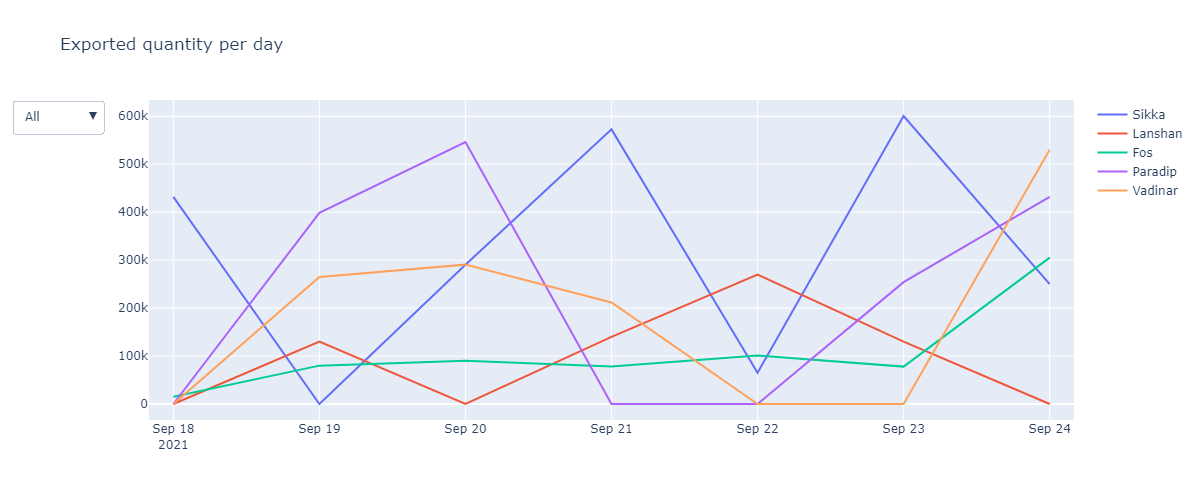

In [19]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Exported quantity in {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=port,
        method='update',
        args=args,
    )

title = 'Exported quantity per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x=df_pivot.eta,
        y=df_pivot[port],
        name=port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

ports_fig.show()

#### Export data to csv

In [20]:
output_path = '' # Change output_path with your path
filename = 'last_week_lineups.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)